# アンサンブル学習: 多数決

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')


%matplotlib inline

## Data Preparation

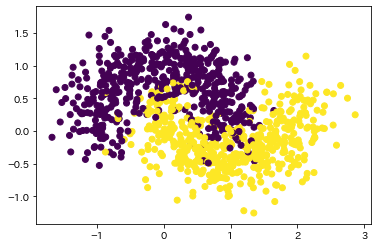

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Hard Voting
- 各分類器の予測を集め、多数決で決まったクラスを全体の予測とすること


In [3]:
np.random.seed(0)

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('rf', tree_clf),
                                          ('svc', svm_clf)],
                              voting='hard')


clf_list = [log_clf, tree_clf, svm_clf, voting_clf]
df_pred = pd.DataFrame()


for clf in clf_list:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    df_pred[clf_name] = y_pred

    print(f'{clf_name}: {acc_score:.3f}')

LogisticRegression: 0.864
DecisionTreeClassifier: 0.892
SVC: 0.896
VotingClassifier: 0.900


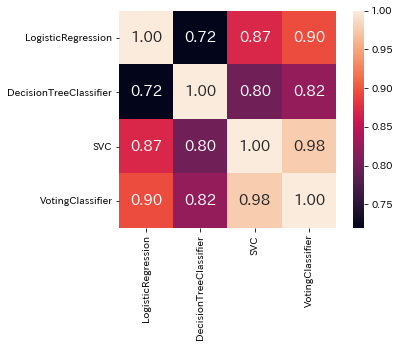

In [4]:
# 各分類器の予測の相関を見る
sns.heatmap(df_pred.corr(),
                cbar=True,
                annot=True,  # 相関係数の表示
                square=True,  # 正方形で表示
                fmt='.2f',
                annot_kws={'size': 15})

## Soft Voting
- 個別の分類器の確率を平均し、もっとも確率の高いクラスを予測クラスとして返す方法
- 自信の高い投票の重みが増すため、ハード投票よりも高い性能を達成することが多い
- すべての分類器がクラスに属する確率を推計できる必要がある
    - つまり、predict_proba() が必要
    - SVCはデフォルトでは predict_proba() が使えないので注意

In [5]:
np.random.seed(0)

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

# SVCクラスは、デフォルトでは確率の推計をしないので probability=True が必要
# SVCクラスは交差検証を使ってクラスに属する確率を推計するようになり、predict_proba()メソッドが追加されるが、訓練のスピードが遅くなる
svm_clf = SVC(probability=True) 


voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('rf', tree_clf),
                                          ('svc', svm_clf)],
                              voting='soft')


clf_list = [log_clf, tree_clf, svm_clf, voting_clf]
df_pred = pd.DataFrame()


for clf in clf_list:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    df_pred[clf_name] = y_pred

    print(f'{clf_name}: {acc_score:.3f}')

LogisticRegression: 0.864
DecisionTreeClassifier: 0.892
SVC: 0.896
VotingClassifier: 0.916


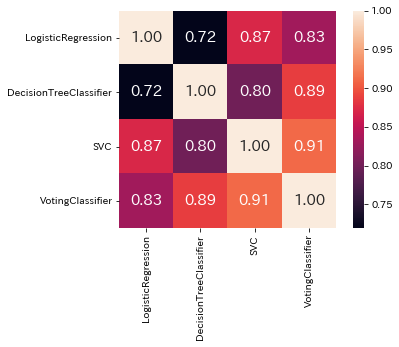

In [6]:
# 各分類器の予測の相関を見る
sns.heatmap(df_pred.corr(),
                cbar=True,
                annot=True,  # 相関係数の表示
                square=True,  # 正方形で表示
                fmt='.2f',
                annot_kws={'size': 15})

## うまくいかないアンサンブル: 線形モデルのみ
- アンサンブル学習がうまくいくのは条件がある
    - すべての分類器が完全に独立している
    - 予測結果の誤りに相関関係がない


In [7]:
np.random.seed(0)

# 全て線形モデル
log_clf = LogisticRegression()
lda_clf = LinearDiscriminantAnalysis()
nb_clf = GaussianNB()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('lda', lda_clf),
                                          ('nb', nb_clf)],
                              voting='hard')

clf_list = [log_clf, lda_clf, nb_clf, voting_clf]
df_pred = pd.DataFrame()

for clf in clf_list:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    df_pred[clf_name] = y_pred

    print(f'{clf_name}: {acc_score:.3f}')

LogisticRegression: 0.864
LinearDiscriminantAnalysis: 0.864
GaussianNB: 0.864
VotingClassifier: 0.864


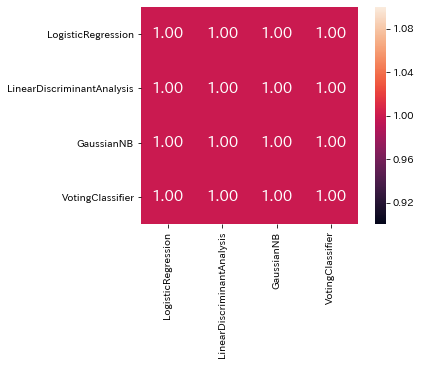

In [8]:
# 各分類器の予測の相関を見る
sns.heatmap(df_pred.corr(),
                cbar=True,
                annot=True,  # 相関係数の表示
                square=True,  # 正方形で表示
                fmt='.2f',
                annot_kws={'size': 15})